<h2>Covid-19 seurantaa</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
%matplotlib inline

# Mahdollisten varoitusten piilotus
warnings.filterwarnings('ignore')

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Ajantasaisen datan nouto ecdc:n sivuilta
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'], format = '%d/%m/%Y')
df = df.drop('dateRep', axis = 1).sort_index()

df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Israel,IL,ISR,8519373.0,Asia,NaN
2019-12-31,31,12,2019,0,0,Spain,ES,ESP,46937060.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Kuwait,KW,KWT,4207077.0,Asia,NaN
2019-12-31,31,12,2019,0,0,Pakistan,PK,PAK,216565317.0,Asia,NaN


In [2]:
# Funktio noutaa datasta maan tiedot (tartunnat, kuolleet, asukasluku) 
# ja esittää 7 päivän liukuvat keskiarvot viivakaaviona
def liukuva7(maa):
    
    df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths', 'popData2019']]
    df_maa = df_maa['2020-03':]
    
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('Tartunnat - 7 päivän liukuva', color = 'C0')
    ax1.plot(df_maa['cases'].rolling(7).mean(), color = 'C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Kuolemat - 7 päivän liukuva', color = 'C1')
    ax2.plot(df_maa['deaths'].rolling(7).mean(), color = 'C1')
    asukasluku = df_maa['popData2019'][0].astype(int).astype(str)
    ax1.set_title(maa + ' (asukasluku 2019: ' + asukasluku + ')')
    
    print(datetime.now())
    
# Neljän maan vertailu, tartuntojen ilmaantuvuus sataa tuhatta asukasta kohden
# kahdessa viikossa
def vertaa4(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    df_maa3 = df[df['countriesAndTerritories'] == maa3]
    df_maa4 = df[df['countriesAndTerritories'] == maa4]
    
    df_maa1['casesp'] = df_maa1['cases'] / (df_maa1['popData2019'] / 100000)
    df_maa2['casesp'] = df_maa2['cases'] / (df_maa2['popData2019'] / 100000)
    df_maa3['casesp'] = df_maa3['cases'] / (df_maa3['popData2019'] / 100000)
    df_maa4['casesp'] = df_maa4['cases'] / (df_maa4['popData2019'] / 100000)
    
    fig, ax = plt.subplots(figsize = (14, 6))
    ax.plot(df_maa1['casesp'].rolling(14).sum(), color = 'C0', label = maa1)
    ax.plot(df_maa2['casesp'].rolling(14).sum(), color = 'C1', label = maa2) 
    ax.plot(df_maa3['casesp'].rolling(14).sum(), color = 'C2', label = maa3)
    ax.plot(df_maa4['casesp'].rolling(14).sum(), color = 'C3', label = maa4) 
    ax.set_ylabel('Ilmaantuvuus 14 pv / 100000')
    ax.set_title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
    ax.legend()
    
    print(datetime.now())

2020-11-23 19:52:19.642458


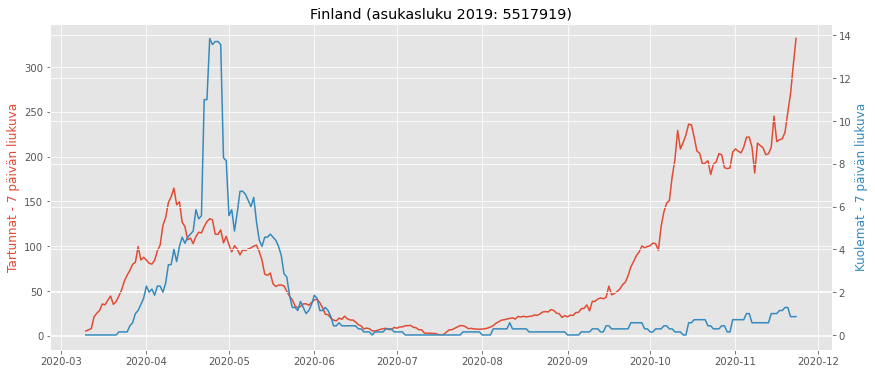

In [3]:
liukuva7('Finland')

2020-11-23 19:52:19.879325


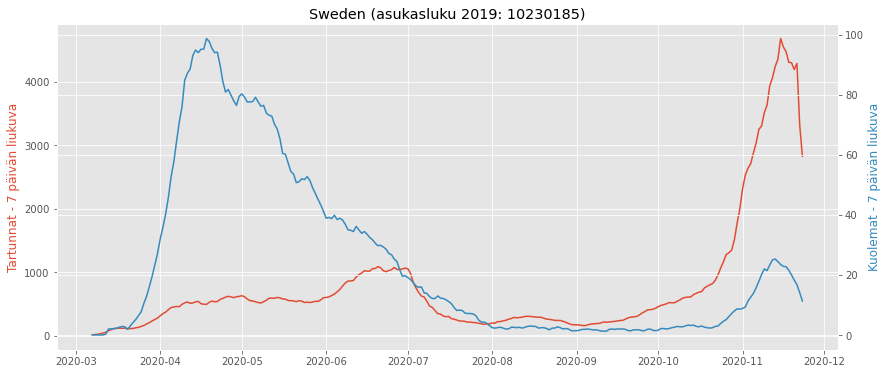

In [4]:
liukuva7('Sweden')

2020-11-23 19:52:20.069297


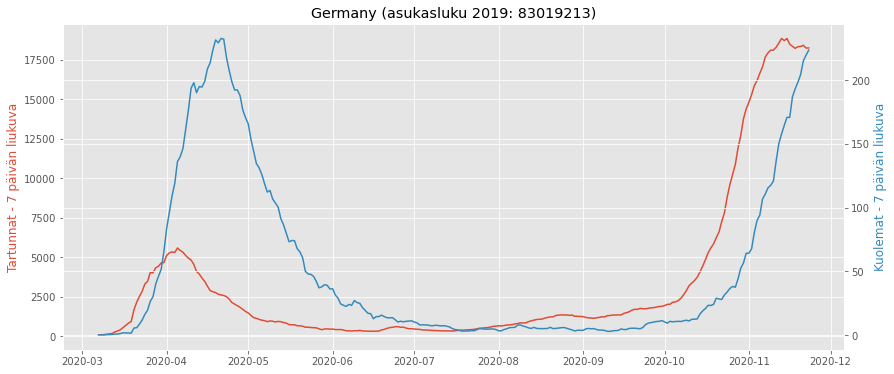

In [5]:
liukuva7('Germany')

2020-11-23 19:52:20.260706


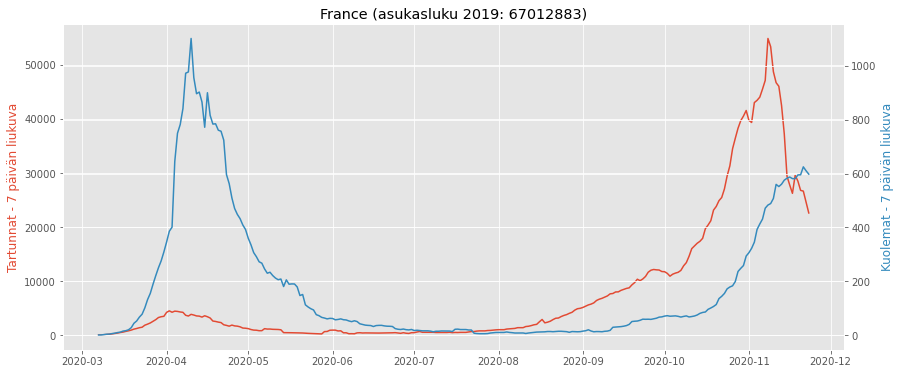

In [6]:
liukuva7('France')

2020-11-23 19:52:20.447206


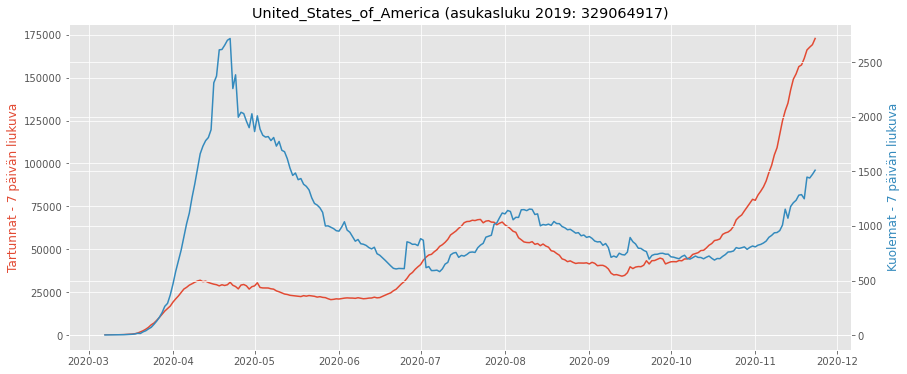

In [7]:
liukuva7('United_States_of_America')

2020-11-23 19:52:20.665660


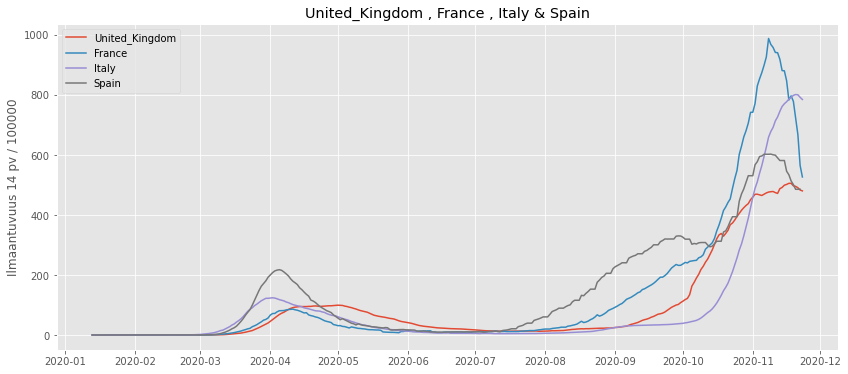

In [8]:
vertaa4('United_Kingdom', 'France', 'Italy', 'Spain')

2020-11-23 19:52:20.861037


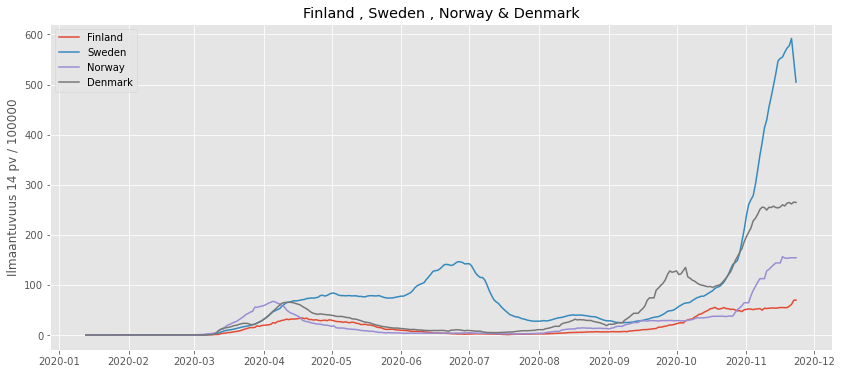

In [9]:
vertaa4('Finland', 'Sweden', 'Norway', 'Denmark')

2020-11-23 19:52:21.042547


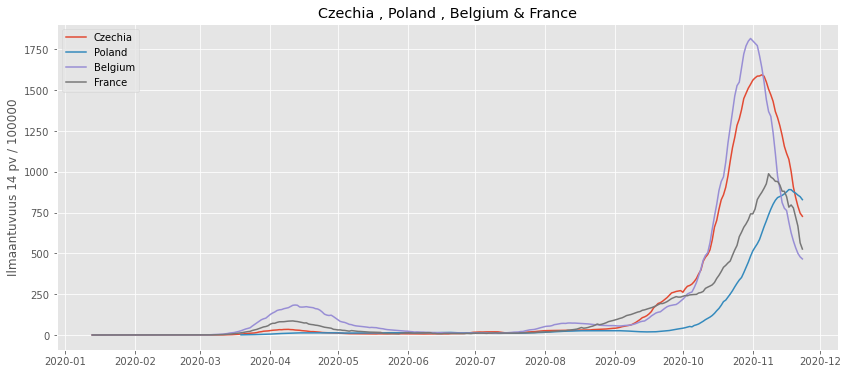

In [10]:
vertaa4('Czechia', 'Poland', 'Belgium', 'France')

In [11]:
# Jos haluat tarkastella muita maita, niin tarkista kirjoitusasu:
np.sort(df['countriesAndTerritories'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er